In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from data_generator import DataGenerator
import pickle
import matplotlib.pyplot as plt

In [19]:
folder_name = 'processed-1'
model = keras.models.load_model('models/002_5eps.h5')

In [20]:
partitions = pickle.load(open('meta/%s/partitions.bin' % folder_name, 'rb'))
labels = pickle.load(open('meta/%s/labels.bin' % folder_name, 'rb'))

In [21]:
predictions = model.predict(
    DataGenerator(
        list_IDs = partitions['validation'],
        labels = labels,
        batch_size = 1,
        dim = (64, 64), 
        n_channels = 1,
        n_classes = 4,
        shuffle = False,
        directory = 'data/%s/' % folder_name
    ),
    verbose = 1
)

12000/12000 [==============================] - 23s 2ms/step


In [22]:
name = ('triangle', 'square', 'circle', 'others')

0.9964166666666666 43


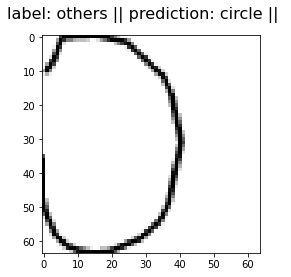

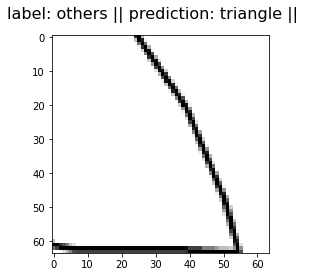

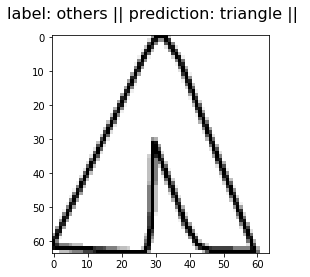

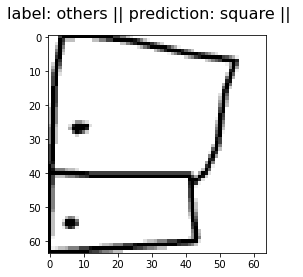

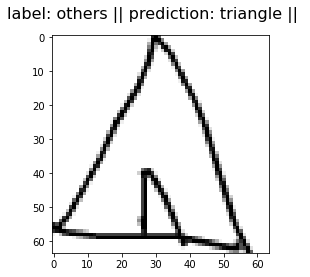

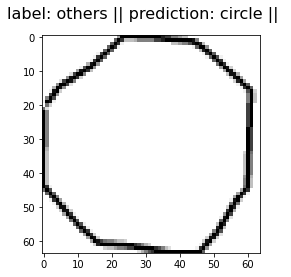

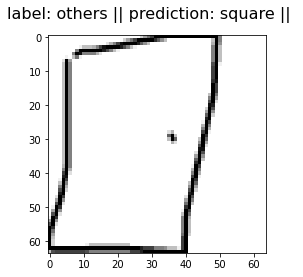

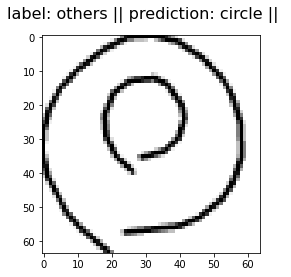

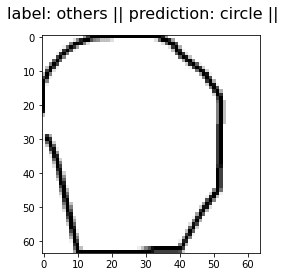

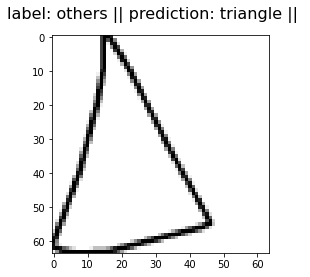

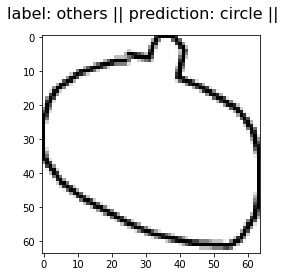

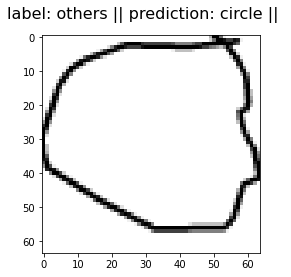

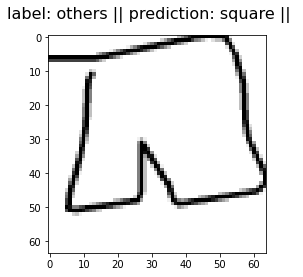

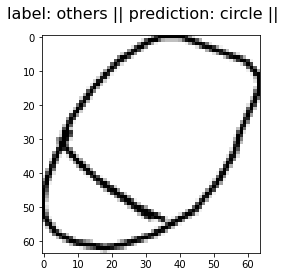

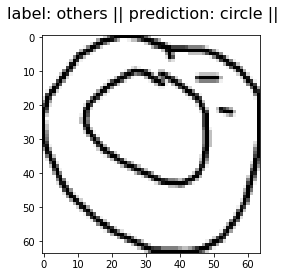

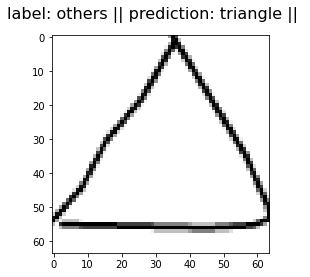

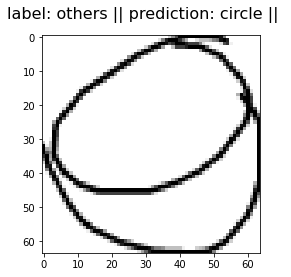

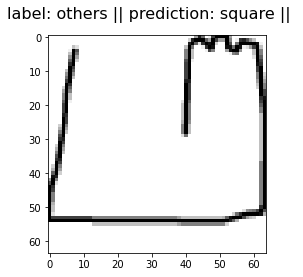

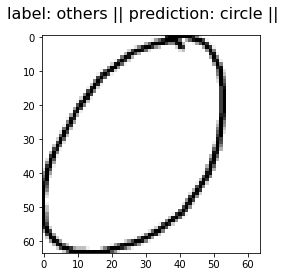

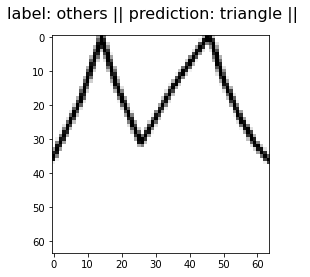

In [23]:
count = 0
for i in range(12000):
    label = labels[partitions['validation'][i]]
    if np.max(predictions[i]) < 0.9: 
        prediction = 3
    else:
        prediction = np.argmax(predictions[i])
    if label == 3 and label != prediction:
        count += 1
        if count <= 20: 
            image = 255 - np.load('data/%s/%s' % (folder_name, partitions['validation'][i])).reshape((64, 64))
            fig = plt.figure()
            plt.imshow(image, cmap='gray')
            fig.suptitle('label: %s || prediction: %s || ' % (name[label], name[prediction]), fontsize=16)
print(1.0 - count / 12000.0, count)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                